In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==0.20.4

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Importar Paquetes

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from termcolor import colored as cl
import itertools 

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [5]:
#Importar Datos y transformaciones inciales

df = pd.read_csv('Data_Scientist_Technical_Challenge.csv')

df['Monto'] = pd.to_numeric(df['Monto'],errors = 'coerce')
df['Q'] = pd.to_numeric(df['Q'],errors = 'coerce')
df['R'] = pd.to_numeric(df['R'],errors = 'coerce')
df['S'] = pd.to_numeric(df['S'],errors = 'coerce')

print(df.head())


   A   B        C  D  E    F    G  H  I   J  ...  L  M  N  O  P    Q    R  \
0  0  10  50257.0  0  0  0.0  0.0  0  0  UY  ...  0  3  1  0  5  0.0  0.0   
1  0  10  29014.0  0  0  0.0  0.0  0  0  UY  ...  0  1  1  0  3  0.0  0.0   
2  0   7     92.0  0  1  0.0  0.0  0  1  UY  ...  0  3  1  0  2  0.0  0.0   
3  9  16  50269.0  0  0  0.0  0.0  0  0  UY  ...  0  3  1  0  5  0.0  0.0   
4  0   8   8180.0  0  0  0.0  0.0  0  0  UY  ...  0  1  1  0  1  0.0  0.0   

       S   Monto  Fraude  
0   7.25   37.51       1  
1  11.66    8.18       1  
2  86.97   13.96       1  
3   2.51   93.67       1  
4  25.96  135.40       1  

[5 rows x 21 columns]


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Country'] = labelencoder.fit_transform(df['J'])
print(df.head())

   A   B        C  D  E    F    G  H  I   J  ...  M  N  O  P    Q    R      S  \
0  0  10  50257.0  0  0  0.0  0.0  0  0  UY  ...  3  1  0  5  0.0  0.0   7.25   
1  0  10  29014.0  0  0  0.0  0.0  0  0  UY  ...  1  1  0  3  0.0  0.0  11.66   
2  0   7     92.0  0  1  0.0  0.0  0  1  UY  ...  3  1  0  2  0.0  0.0  86.97   
3  9  16  50269.0  0  0  0.0  0.0  0  0  UY  ...  3  1  0  5  0.0  0.0   2.51   
4  0   8   8180.0  0  0  0.0  0.0  0  0  UY  ...  1  1  0  1  0.0  0.0  25.96   

    Monto  Fraude  Country  
0   37.51       1       18  
1    8.18       1       18  
2   13.96       1       18  
3   93.67       1       18  
4  135.40       1       18  

[5 rows x 22 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 22 columns):
A          16880 non-null int64
B          16880 non-null int64
C          13683 non-null float64
D          16880 non-null int64
E          16880 non-null int64
F          16880 non-null float64
G          16880 non-null float64
H          16880 non-null int64
I          16880 non-null int64
J          16880 non-null object
K          4016 non-null float64
L          16880 non-null int64
M          16880 non-null int64
N          16880 non-null int64
O          16880 non-null int64
P          16880 non-null int64
Q          16856 non-null float64
R          16874 non-null float64
S          16880 non-null float64
Monto      16642 non-null float64
Fraude     16880 non-null int64
Country    16880 non-null int32
dtypes: float64(8), int32(1), int64(12), object(1)
memory usage: 2.8+ MB


In [8]:
# Cantidad de NA total
(df.isna().sum()/len(df)*100).round(1)

A           0.0
B           0.0
C          18.9
D           0.0
E           0.0
F           0.0
G           0.0
H           0.0
I           0.0
J           0.0
K          76.2
L           0.0
M           0.0
N           0.0
O           0.0
P           0.0
Q           0.1
R           0.0
S           0.0
Monto       1.4
Fraude      0.0
Country     0.0
dtype: float64

In [9]:
# División variables cuantitativas y cualitativas
 
cuantitativas = df.select_dtypes(include = ['int64', 'float64','int32'])
cuantitativas.drop('Fraude', axis = 1, inplace = True)
cuantitativas.drop('Country', axis = 1, inplace = True)

print()
print("Estadísticos descriptivos variables cuantitativas:")
print('===================================================')
print()
 
cuantitativas.describe().round(2)


Estadísticos descriptivos variables cuantitativas:



,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,Monto
count,16880.00,16880.00,13683.00,16880.00,16880.00,16880.00,16880.00,16880.00,16880.00,4016.00,16880.00,16880.00,16880.00,16880.00,16880.00,16856.00,16874.00,16880.00,16642.00
mean,0.31,7.65,39235.34,0.20,0.43,0.02,0.01,0.05,0.14,0.68,0.43,1.54,1.09,0.01,1.63,6.34,1.48,29.13,140.50
std,1.09,4.69,91045.25,2.04,1.54,0.10,0.06,0.53,0.82,0.15,0.66,1.02,0.41,0.12,1.09,46.75,25.55,26.51,160.95
min,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,1.00,1.00,0.00,1.00,0.00,0.00,-1.00,0.05
25%,0.00,4.00,1172.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.00,1.00,1.00,0.00,1.00,0.00,0.00,9.56,33.35
50%,0.00,7.00,6173.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,0.00,1.00,1.00,0.00,1.00,0.00,0.00,20.64,79.64
75%,0.00,11.00,26888.50,0.00,0.00,0.00,0.00,0.00,0.00,0.80,1.00,2.00,1.00,0.00,2.00,0.00,0.00,39.21,190.74
max,30.00,20.00,617324.00,180.00,45.00,1.00,1.00,21.00,24.00,0.99,7.00,13.00,10.00,3.00,41.00,984.42,984.44,99.97,998.11


In [10]:
print()
print("Estadísticos descriptivos variables cualitativas:")
print('===================================================')
print()

cualitativas = df.select_dtypes(include = ['object'])

cualitativas.describe().round(2)


Estadísticos descriptivos variables cualitativas:



,J
count,16880
unique,19
top,AR
freq,9329


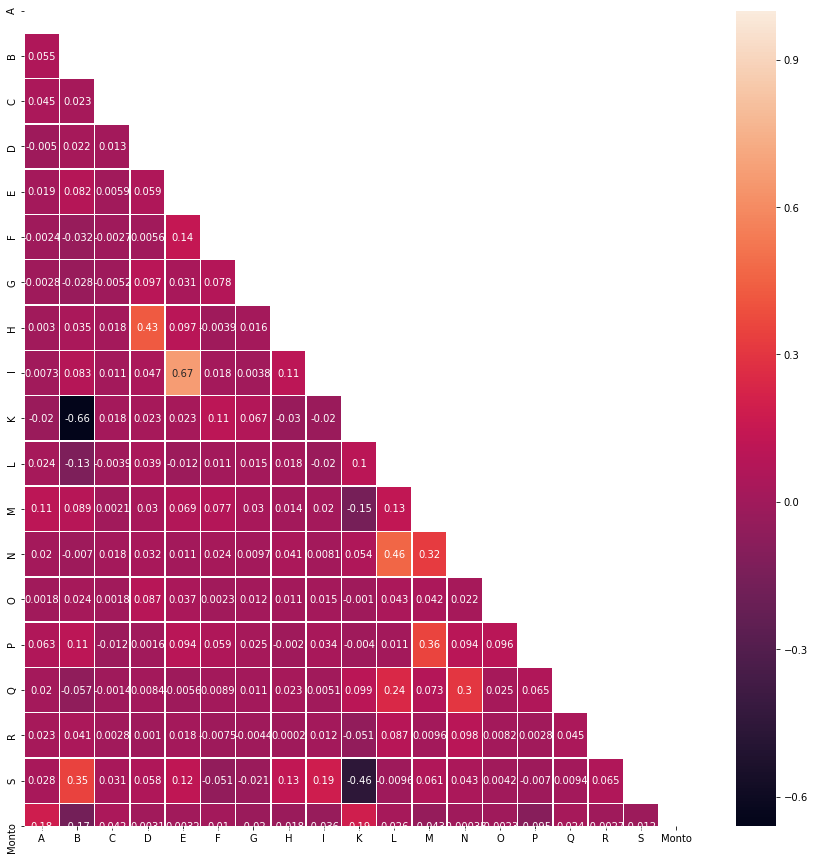

In [31]:
# Matriz de Correlación
import seaborn as sn
corrMatrix = cuantitativas.corr()
plt.figure(figsize = (15,15))
mask = np.triu(np.ones_like(corrMatrix, dtype = bool))
sn.heatmap(corrMatrix, annot=True, linewidths=.5,mask=mask)
plt.savefig('Matriz de Correlación.png')
plt.show()

In [12]:
#Exploración de datos

# Validación Numerica

Registros = len(df)
Total_NoFraudes = len(df[df.Fraude == 0])
Total_Fraudes = len(df[df.Fraude == 1])
Porcentaje_Fraude = round(Total_Fraudes/Total_NoFraudes*100, 2)

print(cl('----'))
print(cl('Total de Registros {}'.format(Registros), attrs = ['bold']))
print(cl('Total de Registros no Fraudelentos {}'.format(Total_NoFraudes), attrs = ['bold']))
print(cl('Total de Registros Fraudelentos {}'.format(Total_Fraudes), attrs = ['bold']))
print(cl('Porcentaje de Casos Fraudulentos {}'.format(Porcentaje_Fraude), attrs = ['bold']))
print(cl('----'))

# Descripción

Registros_NoFraudulentos = df[df.Fraude == 0]
Registros_Fraudulentos = df[df.Fraude == 1]

print(cl('Stats Registros No-Fraudulentos', attrs = ['bold']))
print(Registros_NoFraudulentos.Monto.describe())
print(cl('----'))
print(cl('Stats Registros Fraudulentos', attrs = ['bold']))
print(Registros_Fraudulentos.Monto.describe())
print(cl('----'))


----
Total de Registros 16880
Total de Registros no Fraudelentos 12269
Total de Registros Fraudelentos 4611
Porcentaje de Casos Fraudulentos 37.58
----
Stats Registros No-Fraudulentos
count    12078.000000
mean       147.775621
std        167.903794
min          0.050000
25%         32.905000
50%         85.035000
75%        196.980000
max        998.110000
Name: Monto, dtype: float64
----
Stats Registros Fraudulentos
count    4564.000000
mean      121.249154
std       139.101256
min         1.580000
25%        34.305000
50%        69.060000
75%       158.090000
max       977.040000
Name: Monto, dtype: float64
----


In [15]:
#Normalización de Datos
df.drop('J', axis = 1, inplace = True)

sc = StandardScaler()
df_SS = sc.fit_transform(df[df.columns[0:19]])
df_SS

array([[-0.2826625 ,  0.50244186,  0.12106137, ..., -0.05796642,
        -0.82527032, -0.63990639],
       [-0.2826625 ,  0.50244186, -0.11227069, ..., -0.05796642,
        -0.65891651, -0.82214058],
       [-0.2826625 , -0.13771453, -0.42994851, ..., -0.05796642,
         2.1819237 , -0.78622808],
       ...,
       [ 0.63138789, -0.99125638,  0.45947688, ..., -0.05796642,
        -0.18739211,  0.34253041],
       [-0.2826625 ,  0.2890564 ,  3.94473927, ..., -0.05796642,
        -0.00481786, -0.64326153],
       [-0.2826625 ,  0.92921279, -0.26479383, ..., -0.05796642,
         2.18607311, -0.73888323]])

In [16]:
df2 = pd.DataFrame(df_SS, columns=list('ABCDEFGHIKLMNOPQRSX'))
df2.rename(columns = {'X':'Monto'}, inplace = True)

In [17]:
df2.describe()

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,Monto
count,1.688000e+04,1.688000e+04,1.368300e+04,1.688000e+04,1.688000e+04,1.688000e+04,1.688000e+04,1.688000e+04,1.688000e+04,4.016000e+03,1.688000e+04,1.688000e+04,1.688000e+04,1.688000e+04,1.688000e+04,1.685600e+04,1.687400e+04,1.688000e+04,1.664200e+04
mean,7.580298e-16,2.155556e-15,-9.420222e-18,6.735348e-16,1.100068e-15,9.280672e-16,2.188711e-17,1.802644e-15,2.082418e-15,-1.489996e-16,-7.062702e-15,-3.622274e-15,-1.923721e-15,-6.039173e-16,-5.560534e-15,1.342595e-15,-1.982343e-16,-2.478270e-17,-2.448134e-16
std,1.000030e+00,1.000030e+00,1.000037e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000125e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.826625e-01,-1.844798e+00,-4.309590e-01,-9.726214e-02,-2.821325e-01,-1.608317e-01,-8.752131e-02,-9.471186e-02,-1.746932e-01,-3.667982e+00,-6.512803e-01,-5.322372e-01,-2.248775e-01,-8.078252e-02,-5.797039e-01,-1.356933e-01,-5.796642e-02,-1.136476e+00,-8.726542e-01
25%,-2.826625e-01,-7.778709e-01,-4.180858e-01,-9.726214e-02,-2.821325e-01,-1.608317e-01,-8.752131e-02,-9.471186e-02,-1.746932e-01,-6.662485e-01,-6.512803e-01,-5.322372e-01,-2.248775e-01,-8.078252e-02,-5.797039e-01,-1.356933e-01,-5.796642e-02,-7.381326e-01,-6.657534e-01
50%,-2.826625e-01,-1.377145e-01,-3.631551e-01,-9.726214e-02,-2.821325e-01,-1.608317e-01,-8.752131e-02,-9.471186e-02,-1.746932e-01,-1.369772e-02,-6.512803e-01,-5.322372e-01,-2.248775e-01,-8.078252e-02,-5.797039e-01,-1.356933e-01,-5.796642e-02,-3.201734e-01,-3.781428e-01
75%,-2.826625e-01,7.158273e-01,-1.356171e-01,-9.726214e-02,-2.821325e-01,-1.608317e-01,-8.752131e-02,-9.471186e-02,-1.746932e-01,7.693632e-01,8.551066e-01,4.458972e-01,-2.248775e-01,-8.078252e-02,3.391995e-01,-1.356933e-01,-5.796642e-02,3.804176e-01,3.121322e-01
max,2.713885e+01,2.636296e+00,6.349697e+00,8.801284e+01,2.899090e+01,9.968066e+00,1.674254e+01,3.945000e+01,2.892552e+01,2.009210e+00,9.893429e+00,1.120538e+01,2.183025e+01,2.564769e+01,3.617643e+01,2.092023e+01,3.847335e+01,2.672309e+00,5.328528e+00


In [18]:
df3 = pd.concat([df2, df[df.columns[19:21]]], axis=1)
df3

,A,B,C,D,E,F,G,H,I,K,...,M,N,O,P,Q,R,S,Monto,Fraude,Country
0,-0.282663,0.502442,0.121061,-0.097262,-0.282133,-0.160832,-0.087521,-0.094712,-0.174693,0.769363,...,1.424032,-0.224877,-0.080783,3.095910,-0.135693,-0.057966,-0.825270,-0.639906,1,18
1,-0.282663,0.502442,-0.112271,-0.097262,-0.282133,-0.160832,-0.087521,-0.094712,-0.174693,NaN,...,-0.532237,-0.224877,-0.080783,1.258103,-0.135693,-0.057966,-0.658917,-0.822141,1,18
2,-0.282663,-0.137715,-0.429949,-0.097262,0.368379,-0.160832,-0.087521,-0.094712,1.037816,NaN,...,1.424032,-0.224877,-0.080783,0.339199,-0.135693,-0.057966,2.181924,-0.786228,1,18
3,7.943791,1.782755,0.121193,-0.097262,-0.282133,-0.160832,-0.087521,-0.094712,-0.174693,1.487169,...,1.424032,-0.224877,-0.080783,3.095910,-0.135693,-0.057966,-1.004072,-0.290971,1,18
4,-0.282663,0.075671,-0.341110,-0.097262,-0.282133,-0.160832,-0.087521,-0.094712,-0.174693,NaN,...,-0.532237,-0.224877,-0.080783,-0.579704,-0.135693,-0.057966,-0.119493,-0.031693,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,-0.282663,-0.991256,0.264347,-0.097262,0.368379,4.903617,-0.087521,-0.094712,-0.174693,NaN,...,-0.532237,-0.224877,-0.080783,-0.579704,-0.135693,-0.057966,2.135148,-0.051762,1,2
16876,-0.282663,0.929213,-0.421897,-0.097262,-0.282133,-0.160832,-0.087521,-0.094712,-0.174693,NaN,...,-0.532237,-0.224877,-0.080783,3.095910,-0.135693,-0.057966,-0.627230,-0.709308,1,2
16877,0.631388,-0.991256,0.459477,-0.097262,-0.282133,-0.160832,-0.087521,-0.094712,-0.174693,0.247323,...,-0.532237,-0.224877,-0.080783,-0.579704,-0.135693,-0.057966,-0.187392,0.342530,1,2
16878,-0.282663,0.289056,3.944739,-0.097262,-0.282133,-0.160832,-0.087521,-0.094712,-0.174693,NaN,...,0.445897,-0.224877,-0.080783,-0.579704,-0.135693,-0.057966,-0.004818,-0.643262,1,2


In [19]:
df3 = df3.drop('K', axis = 1, inplace=False)

In [20]:
# Cantidad de NA total
(df3.isna().sum()/len(df3)*100).round(1)

A           0.0
B           0.0
C          18.9
D           0.0
E           0.0
F           0.0
G           0.0
H           0.0
I           0.0
L           0.0
M           0.0
N           0.0
O           0.0
P           0.0
Q           0.1
R           0.0
S           0.0
Monto       1.4
Fraude      0.0
Country     0.0
dtype: float64

In [21]:
df3 = df3.fillna(df3.mean())

In [22]:
# Cantidad de NA total
(df3.isna().sum()/len(df3)*100).round(1)

A          0.0
B          0.0
C          0.0
D          0.0
E          0.0
F          0.0
G          0.0
H          0.0
I          0.0
L          0.0
M          0.0
N          0.0
O          0.0
P          0.0
Q          0.0
R          0.0
S          0.0
Monto      0.0
Fraude     0.0
Country    0.0
dtype: float64

In [23]:
# Preparación de datos para modelado

X = df3.drop('Fraude', axis = 1).values
y = df3['Fraude'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10])


X_train samples :  [[-0.2826625   1.78275464 -0.12700017 -0.09726214 -0.28213252 -0.16083165
  -0.08752131 -0.09471186 -0.1746932  -0.65128035 -0.53223723 -0.22487747
  -0.08078252  1.25810281 -0.13569334 -0.05796642 -0.21681523 -0.72490345
   0.        ]]
X_test samples :  [[-2.82662503e-01 -5.64485454e-01 -9.42022167e-18 -9.72621408e-02
  -2.82132520e-01 -1.60831654e-01 -8.75213126e-02 -9.47118620e-02
  -1.74693200e-01 -6.51280349e-01 -5.32237234e-01 -2.24877469e-01
  -8.07825154e-02 -5.79703900e-01 -1.35693337e-01 -5.79664189e-02
   1.44561068e-01  1.55380068e+00  0.00000000e+00]]
y_train samples :  [1 0 0 1 0 0 1 0 1 1]
y_test samples :  [0 0 0 0 1 0 0 0 1 0]


In [24]:
# Modelado

#Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 5)
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

#K-NN

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

#Logistic Regression

lr = LogisticRegression(max_iter=1000,
                        solver='lbfgs')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

#XGBoost

xgb = XGBClassifier(eval_metric='mlogloss',
                    use_label_encoder=False)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)


In [25]:
# Validación F1 score

print(cl('----'))
print(cl('Validación F1 Score', attrs = ['bold']))
print(cl('----'))
print(cl('F1 score Decision Tree: {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('----'))
print(cl('F1 score KNN: {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold']))
print(cl('----'))
print(cl('F1 score Logistic Regression: {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('----'))
print(cl('F1 score XGBoost: {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('----'))

----
Validación F1 Score
----
F1 score Decision Tree: 0.46423562412342223
----
F1 score KNN: 0.4963981663392272
----
F1 score Logistic Regression: 0.3691588785046729
----
F1 score XGBoost: 0.5650708024275118
----


In [26]:
# Validación Cruzada por modelo

kfold = StratifiedKFold(n_splits=10, random_state=5)

scores = cross_val_score(tree_model, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
print("Presición Decision Tree: mean:(%.1f%%) std:(%.1f%%)" % (scores.mean()*100, scores.std()*100))
print(cl('----'))
scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
print("Presición knn: mean:(%.1f%%) std:(%.1f%%)" % (scores.mean()*100, scores.std()*100))
print(cl('----'))
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
print("Presición Logistic Regression: mean:(%.1f%%) std:(%.1f%%)" % (scores.mean()*100, scores.std()*100))
print(cl('----'))
scores = cross_val_score(xgb, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
print("Presición XGBoost: mean:(%.1f%%) std:(%.1f%%)" % (scores.mean()*100, scores.std()*100))
print(cl('----'))


Presición Decision Tree: mean:(76.3%) std:(1.0%)
----
Presición knn: mean:(76.9%) std:(1.0%)
----
Presición Logistic Regression: mean:(74.9%) std:(0.8%)
----
Presición XGBoost: mean:(80.1%) std:(0.6%)
----


Feature: 0, Score: 0.00879
Feature: 1, Score: 0.60054
Feature: 2, Score: 0.07372
Feature: 3, Score: -0.05092
Feature: 4, Score: 0.04109
Feature: 5, Score: -0.05635
Feature: 6, Score: 0.02216
Feature: 7, Score: 0.09720
Feature: 8, Score: -0.14914
Feature: 9, Score: 0.09986
Feature: 10, Score: 0.03992
Feature: 11, Score: 0.02435
Feature: 12, Score: 0.00404
Feature: 13, Score: 0.24731
Feature: 14, Score: 0.11501
Feature: 15, Score: -0.02059
Feature: 16, Score: 0.36632
Feature: 17, Score: -0.06484
Feature: 18, Score: -0.00072


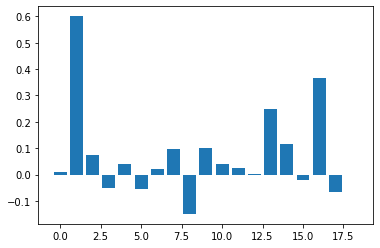

In [27]:
# LR Variables Importantes
from matplotlib import pyplot

importance = lr.coef_[0]

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00020
Feature: 1, Score: 0.39364
Feature: 2, Score: 0.01177
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00999
Feature: 10, Score: 0.00232
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.12849
Feature: 17, Score: 0.00303
Feature: 18, Score: 0.45057


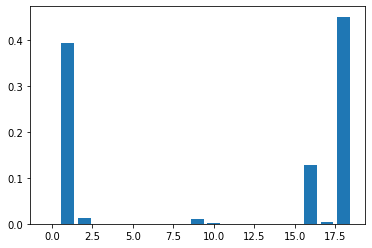

In [29]:
# tree_model Variables Importantes
from matplotlib import pyplot

importance = tree_model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05528
Feature: 1, Score: 0.11052
Feature: 2, Score: 0.04449
Feature: 3, Score: 0.02840
Feature: 4, Score: 0.03324
Feature: 5, Score: 0.03411
Feature: 6, Score: 0.03671
Feature: 7, Score: 0.01633
Feature: 8, Score: 0.05021
Feature: 9, Score: 0.04925
Feature: 10, Score: 0.04188
Feature: 11, Score: 0.04822
Feature: 12, Score: 0.02187
Feature: 13, Score: 0.04697
Feature: 14, Score: 0.05712
Feature: 15, Score: 0.03472
Feature: 16, Score: 0.04562
Feature: 17, Score: 0.03600
Feature: 18, Score: 0.20907


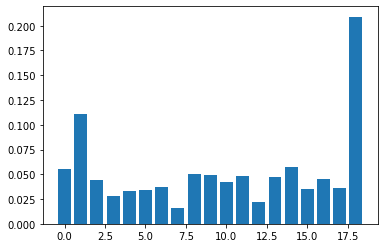

In [30]:
# xgb Variables Importantes

importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()